In [8]:
from os import makedirs
from os.path import basename, dirname, exists, join, realpath
import numpy as np
import matplotlib.pyplot as plt

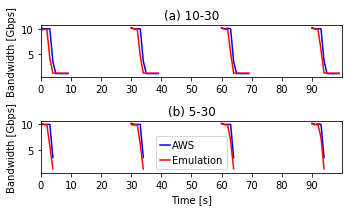

In [9]:


aws = dict()
emulated = dict()
clusters = ["AWS", "emulator"]
exp_type = ["5-30", "10-30"]

filedir = realpath("./")
inputdir = realpath(join(filedir, '../data/fig11/'))

def load_data(file_name):
	crnt_file = open(join(inputdir, file_name))
	lines = crnt_file.readlines()
	crnt_file.close()
	bw_data = [float(x.strip()) for x in lines]
	return bw_data

def plot(fig, ax, aws_data, das_data, stride, legend):
	arr_len = len(aws_data)
	i = 0
	x_coord = 0
	while i < arr_len:
		if (legend == True):
			ax.plot(np.arange(x_coord, x_coord + stride), aws_data[i : i + stride], color="blue", label="AWS")
			ax.plot(np.arange(x_coord, x_coord + stride), das_data[i : i + stride], color="red", label="Emulation")
			legend = False
		else:
			ax.plot(np.arange(x_coord, x_coord + stride), aws_data[i : i + stride], color="blue")
			ax.plot(np.arange(x_coord, x_coord + stride), das_data[i : i + stride], color="red")
			
		i += stride
		x_coord += 30

aws["5-30"] = load_data("AWS_5-30.data")
aws["10-30"] = load_data("AWS_10-30.data")
emulated["5-30"] = load_data("emulator_5-30.data")
emulated["10-30"] = load_data("emulator_10-30.data")
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (5, 3))

plot(fig, ax[0], aws["10-30"], emulated["10-30"], 10, False)
plot(fig, ax[1], aws["5-30"], emulated["5-30"], 5, True)

ax[0].set_xlim(0, 100)
ax[1].set_xlim(0, 100)
ax[1].set_xticks(np.arange(0, 100, 10))
ax[0].set_xticks(np.arange(0, 100, 10))
ax[1].set_xlabel("Time [s]")
ax[0].set_ylabel("Bandwidth [Gbps]")
ax[1].set_ylabel("Bandwidth [Gbps]")
ax[0].set_title("(a) 10-30")
ax[1].set_title("(b) 5-30")
ax[1].legend(bbox_to_anchor=(0.5, 0.8), ncol=1, handlelength=1, handletextpad=0.2)

plt.tight_layout()

plt.show()
